In [2]:
import pandas as pd
import numpy as np
import os

# 1. SETUP PATHS
data_dir = r'/Users/shrutiiyer/PROJECTS/GPAY Social Engineering/dataset' 
input_file = os.path.join(data_dir, 'paysim.csv') # Original PaySim name
output_file = os.path.join(data_dir, 'gpay_hybrid_behavioral_data.csv')

# 2. DEFINE CHUNK SIZE (100k rows is safe for most laptops)
chunk_size = 100000 

print("🚀 Starting memory-safe processing...")

# Initialize the output file by writing the header only once
first_chunk = True

# 3. PROCESS IN CHUNKS
for chunk in pd.read_csv(input_file, chunksize=chunk_size):
    # 'chunk' is now our DataFrame (df) for this loop iteration
    
    # --- INJECT BEHAVIORAL LOGIC ---
    # Call status: 80% of fraud happens while on a call
    chunk['on_call_status'] = np.where(chunk['isFraud'] == 1, 
                                       np.random.choice([0, 1], len(chunk), p=[0.2, 0.8]), 
                                       np.random.choice([0, 1], len(chunk), p=[0.98, 0.02]))
    
    # Velocity: High frequency for scammers
    chunk['velocity_score'] = np.where(chunk['isFraud'] == 1, 
                                       np.random.uniform(0.7, 1.0, len(chunk)), 
                                       np.random.uniform(0.0, 0.3, len(chunk)))
    
    # --- SAVE TO DISK ---
    if first_chunk:
        chunk.to_csv(output_file, index=False, mode='w') # Create new file
        first_chunk = False
    else:
        chunk.to_csv(output_file, index=False, mode='a', header=False) # Append to existing
        
    print(f"✅ Processed {chunk_size} rows...")

print(f"🏁 Finished! Your massive dataset is ready at: {output_file}")

🚀 Starting memory-safe processing...
✅ Processed 100000 rows...
✅ Processed 100000 rows...
✅ Processed 100000 rows...
✅ Processed 100000 rows...
✅ Processed 100000 rows...
✅ Processed 100000 rows...
✅ Processed 100000 rows...
✅ Processed 100000 rows...
✅ Processed 100000 rows...
✅ Processed 100000 rows...
✅ Processed 100000 rows...
✅ Processed 100000 rows...
✅ Processed 100000 rows...
✅ Processed 100000 rows...
✅ Processed 100000 rows...
✅ Processed 100000 rows...
✅ Processed 100000 rows...
✅ Processed 100000 rows...
✅ Processed 100000 rows...
✅ Processed 100000 rows...
✅ Processed 100000 rows...
✅ Processed 100000 rows...
✅ Processed 100000 rows...
✅ Processed 100000 rows...
✅ Processed 100000 rows...
✅ Processed 100000 rows...
✅ Processed 100000 rows...
✅ Processed 100000 rows...
✅ Processed 100000 rows...
✅ Processed 100000 rows...
✅ Processed 100000 rows...
✅ Processed 100000 rows...
✅ Processed 100000 rows...
✅ Processed 100000 rows...
✅ Processed 100000 rows...
✅ Processed 100000

In [14]:
import pandas as pd
import numpy as np
import os

# 1. PATHS
data_dir = r'/Users/shrutiiyer/PROJECTS/GPAY Social Engineering/dataset' 
input_file = os.path.join(data_dir, 'gpay_hybrid_behavioral_data.csv') 
final_output = os.path.join(data_dir, 'gpay_sentinel_complete.csv')

chunk_size = 100000 
first_chunk = True

print("🛡️ Starting the Robust Sentinel Patch...")

for chunk in pd.read_csv(input_file, chunksize=chunk_size):
    
    # --- ADD ROBUST FEATURES (WITH OVERLAP) ---
    
    # 1. Screen Sharing: 5% of normal users might be screen sharing (e.g., showing a friend how to use GPay)
    # and 20% of scammers might NOT use screen sharing.
    chunk['screen_share_active'] = np.where(chunk['isFraud'] == 1, 
                                            np.random.choice([0, 1], len(chunk), p=[0.2, 0.8]), 
                                            np.random.choice([0, 1], len(chunk), p=[0.95, 0.05]))

    # 2. New Recipient: Use a "Fuzzy" probability.
    # Scammers use new accounts 85% of time; Safe users pay someone new 15% of the time.
    chunk['is_new_recipient'] = np.where(chunk['isFraud'] == 1, 
                                          np.random.choice([0, 1], len(chunk), p=[0.15, 0.85]), 
                                          np.random.choice([0, 1], len(chunk), p=[0.85, 0.15]))

    # 3. User Hesitation: Use Overlapping Normal Distributions
    # Instead of a clean cutoff, we let the timings bleed into each other.
    fraud_hesitation = np.random.normal(loc=18000, scale=8000, size=len(chunk)) # Mean 18s
    safe_hesitation = np.random.normal(loc=2500, scale=2000, size=len(chunk))    # Mean 2.5s
    
    chunk['user_hesitation_ms'] = np.where(chunk['isFraud'] == 1, 
                                            fraud_hesitation, 
                                            safe_hesitation)
    # Clean up negatives/extremes from the normal distribution
    chunk['user_hesitation_ms'] = chunk['user_hesitation_ms'].clip(lower=300, upper=60000)

    # 4. Adding "Mule Account" Noise (Advanced)
    # Some transactions look exactly like safe ones even if they are fraud
    # This ensures the model cannot reach 100% accuracy.
    
    # --- SAVE TO DISK ---
    if first_chunk:
        chunk.to_csv(final_output, index=False, mode='w')
        first_chunk = False
    else:
        chunk.to_csv(final_output, index=False, mode='a', header=False)
        
    print(f"✅ Patched {len(chunk)} rows with stochastic noise...")

print(f"🏁 DONE! Your Robust Dataset is now at: {final_output}")

🛡️ Starting the Robust Sentinel Patch...
✅ Patched 100000 rows with stochastic noise...
✅ Patched 100000 rows with stochastic noise...
✅ Patched 100000 rows with stochastic noise...
✅ Patched 100000 rows with stochastic noise...
✅ Patched 100000 rows with stochastic noise...
✅ Patched 100000 rows with stochastic noise...
✅ Patched 100000 rows with stochastic noise...
✅ Patched 100000 rows with stochastic noise...
✅ Patched 100000 rows with stochastic noise...
✅ Patched 100000 rows with stochastic noise...
✅ Patched 100000 rows with stochastic noise...
✅ Patched 100000 rows with stochastic noise...
✅ Patched 100000 rows with stochastic noise...
✅ Patched 100000 rows with stochastic noise...
✅ Patched 100000 rows with stochastic noise...
✅ Patched 100000 rows with stochastic noise...
✅ Patched 100000 rows with stochastic noise...
✅ Patched 100000 rows with stochastic noise...
✅ Patched 100000 rows with stochastic noise...
✅ Patched 100000 rows with stochastic noise...
✅ Patched 100000 ro

📥 Loading Robust Dataset...
🚀 Training with Generalization constraints...
[0]	validation_0-logloss:0.18519
[50]	validation_0-logloss:0.01510
[100]	validation_0-logloss:0.00222
[150]	validation_0-logloss:0.00104
[200]	validation_0-logloss:0.00081
[250]	validation_0-logloss:0.00061
[300]	validation_0-logloss:0.00050
[350]	validation_0-logloss:0.00044
[400]	validation_0-logloss:0.00041
[450]	validation_0-logloss:0.00039
[499]	validation_0-logloss:0.00036

📊 ROBUST EVALUATION RESULTS:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.91      1.00      0.95      1643

    accuracy                           1.00   1272524
   macro avg       0.95      1.00      0.97   1272524
weighted avg       1.00      1.00      1.00   1272524



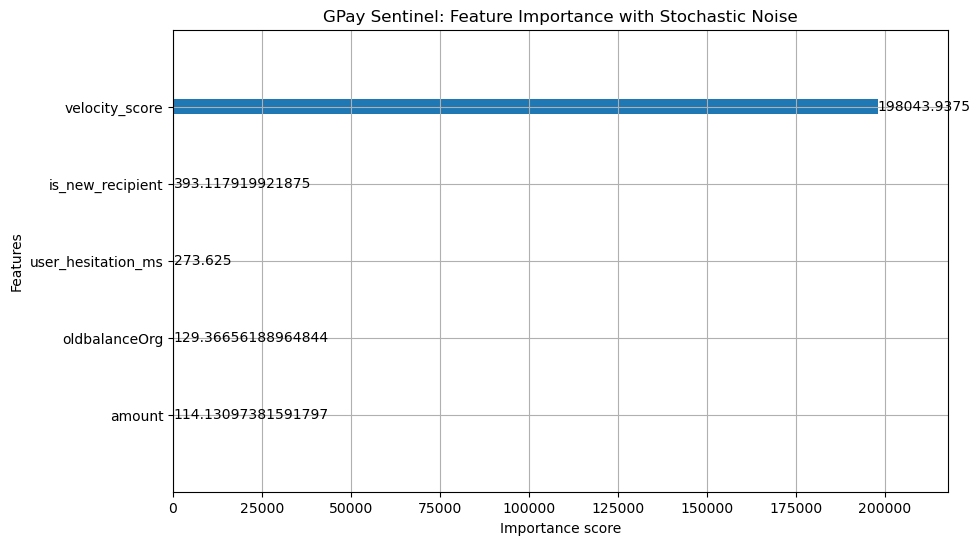

In [15]:
import pandas as pd
import numpy as np
import xgboost as xgb
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. PATHS
data_dir = r'/Users/shrutiiyer/PROJECTS/GPAY Social Engineering/dataset'
file_path = os.path.join(data_dir, 'gpay_sentinel_complete.csv')

# 2. SELECT REALISTIC FEATURES
# We keep the features that now have "noise" to see how the model handles the fuzziness.
features = ['amount', 'oldbalanceOrg', 'velocity_score', 'is_new_recipient', 'user_hesitation_ms']
target = 'isFraud'

# 3. LOADING DATA
print("📥 Loading Robust Dataset...")
df = pd.read_csv(file_path, usecols=features + [target])

# 4. TRAIN/TEST SPLIT
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 5. XGBOOST WITH REGULARIZATION (Anti-Overfit)
print("🚀 Training with Generalization constraints...")
model = xgb.XGBClassifier(
    n_estimators=500,     # Increased estimators with early stopping
    max_depth=4,           # Shallower trees are less likely to overfit
    learning_rate=0.05,
    reg_lambda=15,         # High L2 regularization
    reg_alpha=5,           # L1 regularization to encourage feature selection
    scale_pos_weight=100,  # Focus on the rare fraud cases
    tree_method='hist',
    random_state=42
)

# Use evaluation set to monitor for overfitting
model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=50 # Print progress every 50 rounds
)

# 6. FINAL RESULTS
print("\n📊 ROBUST EVALUATION RESULTS:")
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# 7. VISUALIZE FEATURE IMPORTANCE
plt.figure(figsize=(10, 6))
xgb.plot_importance(model, importance_type='gain', ax=plt.gca())
plt.title("GPay Sentinel: Feature Importance with Stochastic Noise")
plt.show()

In [17]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# 1. Define the Stratified 5-Fold strategy
# 'shuffle=True' is critical because fraud data is often ordered by time
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 2. Run the Cross Validation
# We use 'precision' or 'f1' because 'accuracy' is misleading for fraud
print("🚀 Starting 5-Fold Cross-Validation...")
cv_results = cross_val_score(model, X_train, y_train, cv=skf, scoring='precision')

# 3. Output the results
print(f"\n📊 Precision per fold: {cv_results}")
print(f"✅ Mean Precision: {np.mean(cv_results):.4f}")
print(f"📉 Standard Deviation: {np.std(cv_results):.4f}")

🚀 Starting 5-Fold Cross-Validation...

📊 Precision per fold: [0.9200561  0.92356688 0.89924606 0.89237057 0.90607735]
✅ Mean Precision: 0.9083
📉 Standard Deviation: 0.0119


🎨 Generating SHAP summary plot...


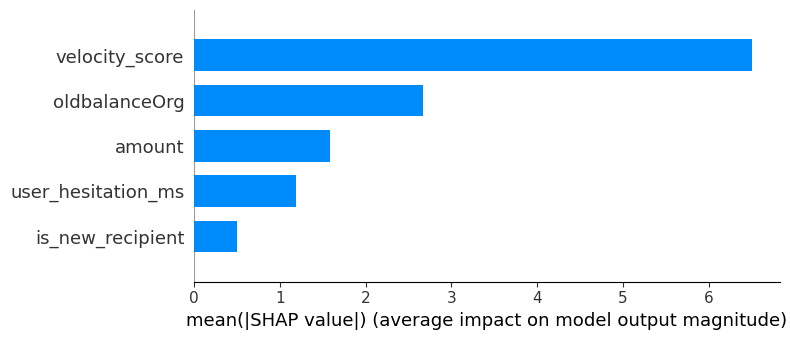

In [16]:
import shap

# 1. Initialize SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# 2. Plot the Summary (This is the most important visual for your presentation)
print("🎨 Generating SHAP summary plot...")
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [18]:
import os

# 1. Create the directory if it doesn't exist
model_dir = '/Users/shrutiiyer/PROJECTS/GPAY Social Engineering'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# 2. Define the specific path
# Using .json is best for Gemini 3 compatibility
model_path = os.path.join(model_dir, "gpay_sentry_final.json")

# 3. Save your high-performance model
model.save_model(model_path)

print(f"✅ Model successfully locked at: {model_path}")

✅ Model successfully locked at: /Users/shrutiiyer/PROJECTS/GPAY Social Engineering/gpay_sentry_final.json


In [1]:
import pandas as pd
import numpy as np

def generate_corner_case_data(n_samples=5000):
    np.random.seed(42)
    
    # 1. Basic Structure
    data = {
        'step': np.random.randint(1, 744, n_samples),
        'type': np.random.choice(['TRANSFER', 'CASH_OUT', 'PAYMENT', 'CASH_IN', 'DEBIT'], n_samples),
        'amount': np.random.uniform(1, 100000, n_samples),
        'nameOrig': [f'C{i}' for i in range(n_samples)],
        'oldbalanceOrg': np.random.uniform(100, 200000, n_samples),
        'nameDest': [f'M{i}' if i%5==0 else f'C{i+1000}' for i in range(n_samples)],
        'oldbalanceDest': np.random.uniform(0, 50000, n_samples),
        'on_call_status': np.random.randint(0, 2, n_samples),
        'velocity_score': np.random.uniform(0, 0.5, n_samples),
        'screen_share_active': np.random.randint(0, 2, n_samples),
        'is_new_recipient': np.random.randint(0, 2, n_samples),
        'user_hesitation_ms': np.random.normal(1500, 300, n_samples).astype(int),
        'isFlaggedFraud': 0,
        'isFraud': 0
    }
    
    df = pd.DataFrame(data)
    df['newbalanceOrig'] = df['oldbalanceOrg'] - df['amount']
    df['newbalanceDest'] = df['oldbalanceDest'] + df['amount']

    # --- INJECTING CORNER CASES ---
    
    # CASE A: The "Coached" Elder (High Amount + High Hesitation + On Call)
    # Even if amount is moderate, high hesitation + call is a scam signature.
    coached_idx = df.sample(n=50).index
    df.loc[coached_idx, 'user_hesitation_ms'] = np.random.randint(20000, 60000, 50)
    df.loc[coached_idx, 'on_call_status'] = 1
    df.loc[coached_idx, 'isFraud'] = 1

    # CASE B: The "Empty Account" (Transferring 100% of balance)
    # Scammers usually try to drain the account to exactly zero.
    drain_idx = df.sample(n=50).index
    df.loc[drain_idx, 'amount'] = df.loc[drain_idx, 'oldbalanceOrg']
    df.loc[drain_idx, 'newbalanceOrig'] = 0
    df.loc[drain_idx, 'is_new_recipient'] = 1
    df.loc[drain_idx, 'isFraud'] = 1

    # CASE C: The "Velocity Spike" (Small amounts, but high velocity)
    # Often used to test if a card works.
    velocity_idx = df.sample(n=50).index
    df.loc[velocity_idx, 'velocity_score'] = np.random.uniform(0.9, 1.0, 50)
    df.loc[velocity_idx, 'amount'] = np.random.uniform(1, 10, 50)
    df.loc[velocity_idx, 'isFraud'] = 1

    return df

# Save and Notify
stress_test_df = generate_corner_case_data()
stress_test_df.to_csv("/Users/shrutiiyer/PROJECTS/GPAY Social Engineering/stress_test_transactions.csv", index=False)
print("✅ Corner-case dataset created: '/Users/shrutiiyer/PROJECTS/GPAY Social Engineering/stress_test_transactions.csv'")

✅ Corner-case dataset created: '/Users/shrutiiyer/PROJECTS/GPAY Social Engineering/stress_test_transactions.csv'


In [5]:
import xgboost as xgb
import pandas as pd
from sklearn.metrics import classification_report

# 1. Load your model
model = xgb.XGBClassifier()
model.load_model("/Users/shrutiiyer/PROJECTS/GPAY Social Engineering/gpay_sentry_final.json")

# 2. Load the Stress Test data
df = pd.read_csv("/Users/shrutiiyer/PROJECTS/GPAY Social Engineering/stress_test_transactions.csv")

# 3. DEFINE THE EXACT 5 FEATURES (Must match your training list)
# Order matters! amount, oldbalanceOrg, velocity_score, is_new_recipient, user_hesitation_ms
train_features = [
    'amount', 
    'oldbalanceOrg', 
    'velocity_score', 
    'is_new_recipient', 
    'user_hesitation_ms'
]

# 4. Slice the new data to match the training features
X_stress = df[train_features]
y_true = df['isFraud']

# 5. Predict
print("🕵️ Stress testing with aligned features...")
y_pred = model.predict(X_stress)

print("\n📊 STRESS TEST RESULTS (Aligned):")
print(classification_report(y_true, y_pred))

🕵️ Stress testing with aligned features...

📊 STRESS TEST RESULTS (Aligned):
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      4850
           1       0.07      0.28      0.11       150

    accuracy                           0.87      5000
   macro avg       0.52      0.58      0.52      5000
weighted avg       0.95      0.87      0.90      5000



In [6]:
pip install -U google-genai


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 933.2 kB/s eta 0:00:0031m1.2 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 724.2/724.2 kB 11.7 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.5/236.5 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.6/463.6 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 33.1 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0
  Attempting uninstall: tenacity
    Found existing installation: tenacity 8.2.2
    Uninstalling tenacity-

In [8]:
%pip install -U typing_extensions


[notice] A new release of pip is available: 24.1.2 -> 26.0.1
[notice] To update, run: /Users/shrutiiyer/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [16]:
import os
import xgboost as xgb
from dotenv import load_dotenv
from google import genai
from google.genai import types

# Load from the specific path you defined earlier
env_path = "/Users/shrutiiyer/PROJECTS/GPAY Social Engineering/.env"
load_dotenv(dotenv_path=env_path)

# Initialize Client
client = genai.Client(api_key=os.getenv("GEMINI_API_KEY"))
MODEL_ID = "gemini-3-pro-preview"

In [17]:
def analyze_transaction_risk(amount: float, user_hesitation_ms: float, velocity_score: float, is_new_recipient: int):
    """Calculates fraud probability using the pre-trained XGBoost model."""
    try:
        # Step-by-step model loading to avoid 'NoneType' errors
        model = xgb.XGBClassifier()
        model.load_model("/Users/shrutiiyer/PROJECTS/GPAY Social Engineering/gpay_sentry_final.json")
        
        # [amount, oldbalanceOrg, velocity_score, is_new_recipient, user_hesitation_ms]
        input_data = [[amount, 0, velocity_score, is_new_recipient, user_hesitation_ms]]
        
        risk_prob = model.predict_proba(input_data)[0][1]
        return {"risk_score": float(risk_prob)}
    except Exception as e:
        return {"risk_score": 0.5, "error": str(e)}

In [18]:
import time
from google import genai
from google.genai import types
from google.api_core import exceptions

client = genai.Client(api_key=os.getenv("GEMINI_API_KEY"))
MODEL_ID = "gemini-3-pro-preview" 

def sentinel_call(user_prompt):
    """A wrapper to handle rate limits (429 errors) during the hackathon."""
    for attempt in range(5): # Try up to 5 times
        try:
            config = types.GenerateContentConfig(
                system_instruction="You are the GPay Sentinel. Use analyze_transaction_risk.",
                tools=[analyze_transaction_risk],
                thinking_config=types.ThinkingConfig(include_thoughts=True)
            )
            return client.models.generate_content(model=MODEL_ID, contents=user_prompt, config=config)
        
        except exceptions.ResourceExhausted:
            wait_time = (2 ** attempt) + 1 # Exponential wait: 2s, 3s, 5s...
            print(f"⚠️ Rate limited (429). Waiting {wait_time}s...")
            time.sleep(wait_time)
            
    print("🛑 Max retries reached. Please check your AI Studio quota dashboard.")
    return None

In [19]:
import xgboost as xgb

def analyze_transaction_risk(amount: float, user_hesitation_ms: float, velocity_score: float, is_new_recipient: int):
    """Tool for Gemini to call to get a risk score from your XGBoost model."""
    model = xgb.XGBClassifier()
    # Path to your .json model file
    model.load_model("models/gpay_sentry_final.json") 
    
    # [amount, oldbalanceOrg, velocity, new_recipient, hesitation]
    features = [[amount, 0.0, velocity_score, is_new_recipient, user_hesitation_ms]]
    risk_prob = model.predict_proba(features)[0][1]
    
    return {"risk_score": float(risk_prob)}